<a href="https://colab.research.google.com/github/PreethiGorantla/MNIST--digit--recognizer/blob/main/HandWritten_Digit_Recognization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical


In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (60000, 28, 28)
y_train shape: (60000,)
X_test shape: (10000, 28, 28)
y_test shape: (10000,)


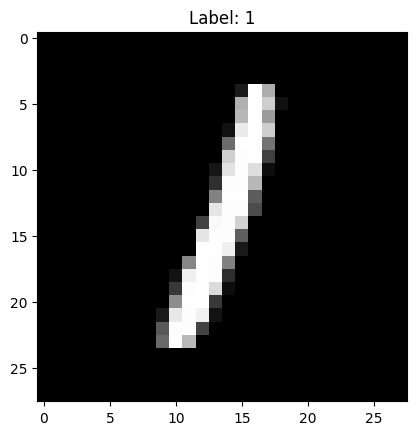

In [ ]:
import matplotlib.pyplot as plt
import random

# Pick a random index
idx = random.randint(0, len(X_train)-1)

plt.imshow(X_train[idx], cmap='gray')
plt.title(f"Label: {y_train[idx]}")
plt.show()


In [ ]:
# Normalize
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape for CNN
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print("X_train shape after preprocessing:", X_train.shape)
print("y_train shape after preprocessing:", y_train.shape)


X_train shape after preprocessing: (60000, 28, 28, 1)
y_train shape after preprocessing: (60000, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes for digits 0-9
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=10,            # You can increase to 15-20 for slightly better accuracy
    batch_size=128,
    validation_split=0.2   # 20% of training data for validation
)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 47s 117ms/step - accuracy: 0.7809 - loss: 0.6987 - val_accuracy: 0.9740 - val_loss: 0.0894
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 117ms/step - accuracy: 0.9645 - loss: 0.1205 - val_accuracy: 0.9845 - val_loss: 0.0532
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 114ms/step - accuracy: 0.9741 - loss: 0.0851 - val_accuracy: 0.9858 - val_loss: 0.0487
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 122ms/step - accuracy: 0.9810 - loss: 0.0651 - val_accuracy: 0.9881 - val_loss: 0.0419
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 79s 114ms/step - accuracy: 0.9838 - loss: 0.0540 - val_accuracy: 0.9890 - val_loss: 0.0392
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 84s 119ms/step - accuracy: 0.9874 - loss: 0.0423 - val_accuracy: 0.9895 - val_loss: 0.0373
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 117ms/step - accuracy: 0.9877 - loss: 0.0390 - val_accuracy: 0.9902 - val_loss: 0.0353
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 81s 115ms/step - accuracy: 0.9888 - loss: 0

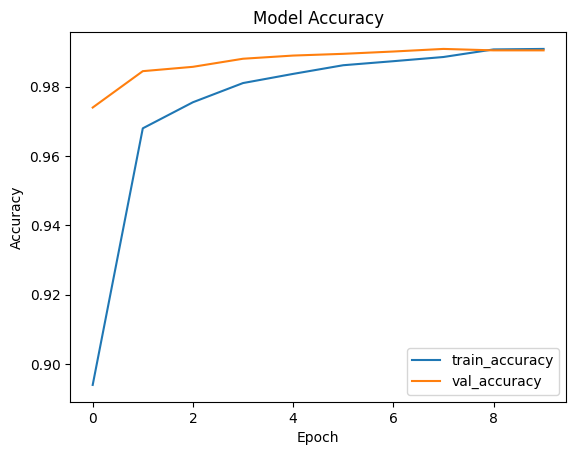

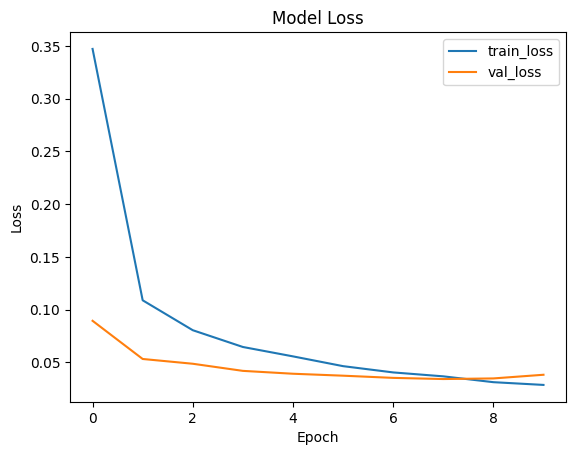

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9886 - loss: 0.0330
Test Accuracy: 99.13%


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


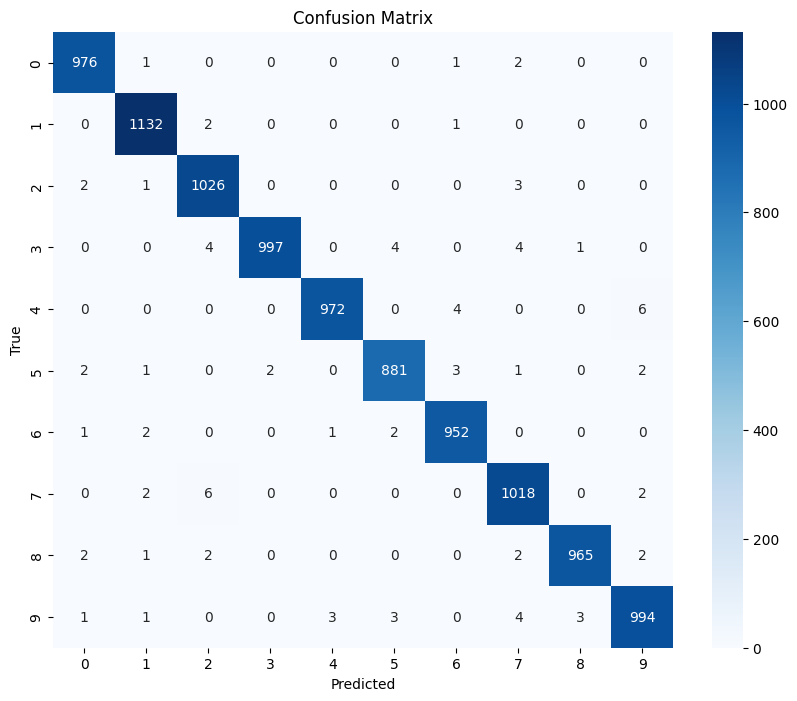

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Predict classes
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
!pip install streamlit
!pip install pyngrok


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 65.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 93.8 MB/s eta 0:00:00


In [ ]:
model.save("digit_recognizer.h5")


In [ ]:
%%writefile app.py
import streamlit as st
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image, ImageOps

# Load model
model = load_model("digit_recognizer.h5")

st.title("Handwritten Digit Recognition")

uploaded_file = st.file_uploader("Upload or draw a digit", type=["png","jpg","jpeg"])

if uploaded_file is not None:
    image = Image.open(uploaded_file).convert('L')  # grayscale
    image = ImageOps.invert(image)                  # invert colors
    image = image.resize((28,28))                  # resize
    st.image(image, caption='Uploaded Digit', use_column_width=True)

    img_array = np.array(image).reshape(1,28,28,1)/255.0
    prediction = model.predict(img_array)
    st.write(f"Predicted Digit: {np.argmax(prediction)}")


Writing app.py


In [ ]:
!npm install -g cloudflared


⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙
changed 1 package in 2s
⠙

In [ ]:
# Start Streamlit in the background
!streamlit run app.py --server.port 8501 &

# Wait a few seconds, then start the tunnel
import time, os
time.sleep(5)
os.system("cloudflared tunnel --url http://localhost:8501")





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.66.150.81:8501

  Stopping...
